This script plot the difference between CTRL and CUX1 KD ATAC seq signal in human CD34+ HSPC for the CUX1-promotor bound loops and non-interacting loops. The loops are identified from CD34 HiC in Zhang 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

Import the count matrix from `computeMatrix`.

In [2]:
# First two: CREs (loop region, not precise enhancer)
#CREs = pd.read_csv('CD34_ATAC_CUX1_interacting_loops_Heatmap_values.txt', header=0, sep='\t')
#loops_wo_CREs = pd.read_csv('CD34_ATAC_non_CUX1_interacting_loops_Heatmap_values.txt', header=0, sep='\t')
CREs = pd.read_csv('matrix_CREs.tab', header=0, sep='\t')
loops_wo_CREs = pd.read_csv('matrix_loops_without_CREs.tab', header=0, sep='\t')
enhancers = pd.read_csv('matrix_enhancers.tab', header=0, sep='\t')
loops_wo_enhancers = pd.read_csv('matrix_loops_without_enhancers.tab', header=0, sep='\t')
CREs

,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.1,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.2,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.3,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.4,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.5,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.6,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.7,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.8,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.9,...,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.30,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.31,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.32,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.33,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.34,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.35,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.36,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.37,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.38,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.39
0,1.2190,1.0210,0.5403,0.1713,0.08565,0.0000,0.08565,0.1713,0.2569,0.8829,...,0.1968,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.1968,0.3936,0.5904
1,0.6259,0.5139,0.3426,0.1713,0.28340,0.9093,1.42300,1.8250,1.5420,1.1990,...,0.3936,0.6888,0.9840,0.8800,0.5792,0.2839,0.09277,0.1968,0.5792,1.1470
2,1.5350,1.4760,1.4760,1.1930,1.64700,1.7590,1.47600,1.0810,1.0280,1.4820,...,1.5410,1.3440,0.5792,0.5792,0.7647,0.8631,0.96150,0.7647,0.5679,0.1855
3,0.3426,0.4547,0.2834,0.2834,0.00000,0.0000,0.17130,0.3426,0.6259,0.8237,...,0.0000,0.0000,0.0000,0.0984,0.1968,0.2952,0.29520,0.2952,0.3823,0.6550
4,0.0000,0.1713,0.3426,0.5139,0.34260,0.1713,0.00000,0.0000,0.1713,0.4282,...,0.3711,0.3711,0.3711,0.3711,0.3711,0.1855,0.00000,0.0000,0.0000,0.1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.2834,0.0000,0.0000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.0000,...,0.0000,0.1968,0.3936,0.5904,0.3936,0.1968,0.18550,0.1855,0.5566,0.7422
161,0.3426,0.1713,0.0000,0.1713,0.51390,0.9421,1.11300,0.9421,0.7708,0.8829,...,0.3936,0.7872,1.1810,0.9728,0.7647,0.3711,0.18550,0.3823,0.7647,0.9615
162,1.2520,1.2780,1.8190,2.0490,2.22000,1.8780,1.33800,0.9685,0.8829,0.9950,...,0.9502,1.1470,1.7150,1.9000,1.4310,1.1580,1.34400,1.5290,0.9502,0.7647
163,0.5667,0.2834,0.1713,0.3426,0.68520,0.8565,1.02800,0.8565,0.5139,0.3426,...,1.3440,1.0370,1.1130,1.1250,0.9502,0.5904,0.57920,0.7534,0.7422,0.5566


Aggregate the RPKM values for all the bins (columns) for each region.

In [3]:
CREs_CTRL = CREs.filter(regex = 'CTRL|WT').sum(axis=1)
CREs_KD = CREs.filter(regex = 'KD').sum(axis=1)
CREs_plot = pd.DataFrame({'CTRL': CREs_CTRL,'KD': CREs_KD})

In [4]:
loops_wo_CREs_CTRL = loops_wo_CREs.filter(regex = 'CTRL|WT').sum(axis=1)
loops_wo_CREs_KD = loops_wo_CREs.filter(regex = 'KD').sum(axis=1)
loops_wo_CREs_plot_no_size_match = pd.DataFrame({'CTRL': loops_wo_CREs_CTRL,'KD': loops_wo_CREs_KD})

# Size matching
loops_wo_CREs_plot = loops_wo_CREs_plot_no_size_match.sample(n = CREs_plot.shape[0])

In [5]:
enhancers_CTRL = enhancers.filter(regex = 'CTRL').sum(axis=1)
enhancers_KD = enhancers.filter(regex = 'KD').sum(axis=1)
enhancers_plot = pd.DataFrame({'CTRL': enhancers_CTRL,'KD': enhancers_KD})

In [6]:
loops_wo_enhancers_CTRL = loops_wo_enhancers.filter(regex = 'CTRL').sum(axis=1)
loops_wo_enhancers_KD = loops_wo_enhancers.filter(regex = 'KD').sum(axis=1)
loops_wo_enhancers_plot_no_size_match = pd.DataFrame({'CTRL': loops_wo_enhancers_CTRL,'KD': loops_wo_enhancers_KD})

# Size matching
loops_wo_enhancers_plot = loops_wo_enhancers_plot_no_size_match.sample(n = enhancers_plot.shape[0])

Perform statistical test

In [7]:
scipy.stats.ttest_ind(CREs_plot['CTRL'], CREs_plot['KD'])

Ttest_indResult(statistic=0.42612166171095567, pvalue=0.670298695677003)

In [8]:
scipy.stats.ttest_ind(loops_wo_CREs_plot['CTRL'], loops_wo_CREs_plot['KD'])

Ttest_indResult(statistic=0.5957380243596633, pvalue=0.5517610972017137)

In [9]:
scipy.stats.ttest_ind(enhancers_plot['CTRL'], enhancers_plot['KD'])

Ttest_indResult(statistic=5.278713741399263, pvalue=1.3662970994548513e-07)

In [10]:
scipy.stats.ttest_ind(loops_wo_enhancers_plot['CTRL'], loops_wo_enhancers_plot['KD'])

Ttest_indResult(statistic=1.8967678090489828, pvalue=0.05792677780406642)

Plot

In [11]:
CREs_plot['sample']='CREs'
loops_wo_CREs_plot['sample']='loops_wo_CREs'
enhancers_plot['sample']='enhancers'
loops_wo_enhancers_plot['sample']='loops_wo_enhancers'

In [12]:
CREs_plot = pd.melt(CREs_plot,id_vars='sample',var_name="condition",value_name="RPKM")
loops_wo_CREs_plot = pd.melt(loops_wo_CREs_plot,id_vars='sample',var_name="condition",value_name="RPKM")
enhancers_plot = pd.melt(enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")
loops_wo_enhancers_plot = pd.melt(loops_wo_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")

In [13]:
final_plot=CREs_plot.append(loops_wo_CREs_plot)
final_plot=final_plot.append(enhancers_plot)
final_plot=final_plot.append(loops_wo_enhancers_plot)
final_plot['log2_RPKM'] = np.log2(final_plot['RPKM'])

/Users/alexandregaubil/opt/anaconda3/envs/bioinformatics/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


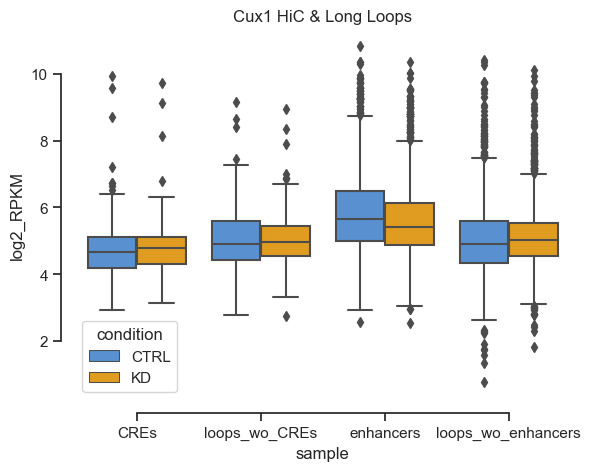

In [14]:
sns.set_theme(style="ticks")
my_pal = {"CTRL":"#448ee4","KD": "orange"}
sns.boxplot(
	x="sample", 
	y="log2_RPKM",
	hue="condition",
	palette=my_pal,
	data=final_plot
).set_title("Cux1 HiC & Long Loops")
sns.despine(offset=10, trim=True)